In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import os
from pathlib import Path
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy.optimize import curve_fit

import plotly.io as pio
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [11]:
def load_metadata_videos(file_path):
    return pd.read_csv(file_path).drop(columns=['Unnamed: 0','Unnamed: 0.1']).dropna()

In [3]:
file_path = r"C:\Users\Flori\Docs\Python\M2_S3_ADA\Project - data\Education_videos_6.csv"
df_education = load_metadata_videos(file_path)

In [4]:
df_education.sample(3)

categories                channel_id                  crawl_date  \
253197  Education  UC7LrpWo-6sSfIgLDa_Sj2ZQ  2019-11-10 08:30:52.918086   
118039  Education  UCABe2FgVNv2hgBeMu2mySVg  2019-11-13 14:04:23.770087   
22420   Education  UCBCaO28GYGr7IoKVjT4Jx5A  2019-11-12 11:33:18.682159   

                                              description  dislike_count  \
253197  The latest fortnightly tour of my Veg growing ...            0.0   
118039  Most important tips to develop a desciplined l...           20.0   
22420   Max Liboiron is a feminist environmental scien...            3.0   

         display_id  duration  like_count  \
253197  PWthRd9nPDM       372       104.0   
118039  jvWQ6FadXhk       546       361.0   
22420   9UD6tNSGyzE       173         6.0   

                                                     tags  \
253197  allotment,diary,october,1st,vegetable,growing,...   
118039  ias preparation,upsc preparation,unacademy,una...   
22420   cooper hewitt,design,design education,design t...   

                                                    title  \
253197  Allotment Diary Oct 1st : Fortnightly Veg Plot...   
118039  How To Make Best Use Of Technology For UPSC/SS...   
22420   Dr. Max Liboiron "BabyLegs" | Nature–Design Tr...   

                upload_date  view_count  
253197  2014-10-01 00:00:00      4155.0  
118039  2017-10-23 00:00:00     12511.0  
22420   2019-07-03 00:00:00       214.0

In [12]:
file_path = r"C:\Users\Flori\Docs\Python\M2_S3_ADA\Project - data\viva\clean_viva.csv"
df_education_viva = load_metadata_videos(file_path)

In [13]:
df_education_viva.sample(3)

categories                channel_id                  crawl_date  \
128053  Education  UC_XzTUf4KW0N0TtMAfCesKA  2019-11-12 07:07:10.511965   
208656  Education  UCwMNVCXcSWNMS0C8rcRCWxA  2019-11-15 13:56:07.044067   
327371  Education  UC4xqQPQuxdxPbwfa5GYm_rQ  2019-11-14 14:47:13.916496   

                                              description  dislike_count  \
128053  Speaker: Br. Shafi, President UIRC.\n\nfollow ...           18.0   
208656  1. Haloalkanes - Chloroform\n2. Important reac...            1.0   
327371  Want a DISTINCTION in YOUR next ABRSM Exam? ht...            4.0   

         display_id  duration  like_count  \
128053  A3yjxi9UPwk       303       437.0   
208656  gGzvXJULt70      1801       216.0   
327371  XuP0hXs-xZU        58        27.0   

                                                     tags  \
128053  Telugu Islam Dawah,Dawah UIRC,Islamic speeches...   
208656  NEET,Botany,Biology,PMT,AIIMS,AIPMT,11th,12th,...   
327371  Allegretto - Thomas Attwood - ABRSM 2017-18 Gr...   

                                                    title  \
128053  UIRC : అస్సలాముఅలైకుం వారహ్మతుల్లాహి వాబరకాతుహ...   
208656  AIIMS / NEET 2019 - Organic Chemistry : Alkyl ...   
327371  Allegretto - Thomas Attwood - ABRSM 2017 / 18 ...   

                upload_date  view_count  duration_in_min channel_category  \
128053  2016-10-11 00:00:00     19122.0         5.050000        Education   
208656  2018-10-11 00:00:00      6583.0        30.016667        Education   
327371  2016-07-14 00:00:00      4964.0         0.966667        Education   

       classified_category  upload_year duration_bin  likes_per_view  \
128053         Edutainment         2016         5-10        0.022853   
208656             Science         2018        30-40        0.032812   
327371               Music         2016          0-5        0.005439   

        dislikes_per_view  
128053           0.000941  
208656           0.000152  
327371           0.000806

In [15]:
df_education_viva.columns

Index(['categories', 'channel_id', 'crawl_date', 'description',
       'dislike_count', 'display_id', 'duration', 'like_count', 'tags',
       'title', 'upload_date', 'view_count', 'duration_in_min',
       'channel_category', 'classified_category', 'upload_year',
       'duration_bin', 'likes_per_view', 'dislikes_per_view'],
      dtype='object')

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.linear_model import LinearRegression


def analyze_trends(df_education, classification_type):
    if classification_type not in ['channel_category', 'classified_category']:
        raise ValueError("classification_type must be either 'channel_category' or 'classified_category'")

    # Ensure upload_date is in datetime format
    df_education['upload_date'] = pd.to_datetime(df_education['upload_date'])

    # Bar plot: Number of videos per category per year
    yearly_data = df_education.groupby(['upload_year', classification_type]).size().reset_index(name='video_count')
    yearly_data['upload_year'] = yearly_data['upload_year'].apply(lambda x: str(x))
    yearly_data = yearly_data.sort_values(['video_count']).reset_index(drop=True)
    plt.figure(figsize=(15, 7))
    sns.barplot(
        data=yearly_data,
        x=classification_type,
        y='video_count',
        hue='upload_year',
        dodge=True
    )
    plt.title('Number of Videos per Category per Year')
    plt.ylabel('Number of Videos')
    plt.yscale('log')
    plt.xlabel('Year')
    plt.legend(title=classification_type)
    plt.show()
    
    # Group by classification and time for aggregated analysis
    grouped = df_education.groupby([
        pd.Grouper(key='upload_date', freq='M'), classification_type
    ]).agg({
        'view_count': 'sum',
        'like_count': 'sum',
        'dislike_count': 'sum',
        'duration': 'sum',
        'channel_id': 'count'  # Counts the number of videos
    }).rename(columns={'channel_id': 'video_count'}).reset_index()

    # Trend Analysis: Number of videos, total duration, views, likes, dislikes over time
    plt.figure(figsize=(15, 7))
    sns.lineplot(data=grouped, x='upload_date', y='video_count', hue=classification_type, marker='o')
    plt.title('Number of Videos Over Time by Category')
    plt.ylabel('Number of Videos')
    plt.xlabel('Time')
    plt.legend(title=classification_type)
    plt.show()

    # Seasonality Analysis: When people post each type of category
    k = 1
    plt.figure(figsize=(15,5))
    for category in df_education[classification_type].unique():
        category_data = grouped[grouped[classification_type] == category]
        if len(category_data) > 12:  # Ensure enough data for seasonality analysis
            plt.subplot(1, 3, k)
            result = seasonal_decompose(category_data['video_count'], model='additive', period=12)
            plt.plot(result.observed, label="Observed", color='blue')
            plt.plot(result.trend, label="Trend", color='orange')
            plt.plot(result.seasonal, label="Seasonal", color='green')
            plt.xticks(ticks=np.arange(0,480,120), labels=np.arange(2015, 2019), rotation=30, fontsize=10, ha='right')
            plt.title(category, fontsize=15)
            plt.ylabel('Scores', fontsize=12)
            plt.xlabel('Year', fontsize=12)
            plt.legend(loc='upper left')
            k += 1
        if k > 3:
            plt.show()
            k=1
            plt.figure(figsize=(15,5))
        
    

    # Emerging/Declining Categories: Percent change
    grouped['percent_change_videos'] = grouped.groupby(classification_type)['video_count'].pct_change() * 100
    plt.figure(figsize=(15, 7))
    sns.lineplot(data=grouped, x='upload_date', y='percent_change_videos', hue=classification_type)
    plt.title('Percent Change in Number of Videos Over Time')
    plt.ylabel('Percent Change (%)')
    plt.xlabel('Time')
    plt.legend(title=classification_type)
    plt.show()

    # Popularity Analysis: Like/views and dislike/views over time and category
    grouped['likes_per_view'] = grouped['like_count'] / grouped['view_count']
    grouped['dislikes_per_view'] = grouped['dislike_count'] / grouped['view_count']

    plt.figure(figsize=(15, 7))
    sns.lineplot(data=grouped, x='upload_date', y='likes_per_view', hue=classification_type)
    plt.title('Likes per View Over Time by Category')
    plt.ylabel('Likes per View')
    plt.xlabel('Time')
    plt.legend(title=classification_type)
    plt.show()

    plt.figure(figsize=(15, 7))
    sns.lineplot(data=grouped, x='upload_date', y='dislikes_per_view', hue=classification_type)
    plt.title('Dislikes per View Over Time by Category')
    plt.ylabel('Dislikes per View')
    plt.xlabel('Time')
    plt.legend(title=classification_type)
    plt.show()

    # Views per minute over time and category
    grouped['views_per_minute'] = grouped['view_count'] / (grouped['duration'] / 60)

    plt.figure(figsize=(15, 7))
    sns.lineplot(data=grouped, x='upload_date', y='views_per_minute', hue=classification_type)
    plt.title('Views per Minute Over Time by Category')
    plt.ylabel('Views per Minute')
    plt.xlabel('Time')
    plt.legend(title=classification_type)
    plt.show()

    # Views per category over time
    plt.figure(figsize=(15, 7))
    sns.lineplot(data=grouped, x='upload_date', y='view_count', hue=classification_type)
    plt.title('Views Over Time by Category')
    plt.ylabel('Views')
    plt.xlabel('Time')
    plt.legend(title=classification_type)
    plt.show()

    # Exponential Fits: Number of videos and durations
    # def exp_fit(data):
    #     x = np.arange(len(data)).reshape(-1, 1)
    #     y = np.log1p(data)  # Use log1p to handle zero values

    #     model = LinearRegression()
    #     model.fit(x, y)
    #     y_pred = np.expm1(model.predict(x))  # Reverse log transformation
    #     return y_pred, model.coef_[0]  # Return predicted values and slope

    def exp_fit(col):

        def exponential_model(x, a, b):
            return a * np.exp(b * x)
        
        x = np.arange(col.shape[0])
        x = x / np.max(x)
        popt, pcov = curve_fit(exponential_model, x, col)
        a, b = popt
        y_fit = exponential_model(x, a, b)
        return y_fit, a
    
    plt.figure(figsize=(15, 6))
    slopes = {}
    for category in df_education[classification_type].unique():
        category_data = grouped[grouped[classification_type] == category]
        if len(category_data) > 0:
            predicted, slope = exp_fit(category_data['video_count'])
            slopes[category] = slope
            plt.plot(category_data['upload_date'], predicted, label=f'{category} (Slope: {slope:.2f})')

    plt.title('Exponential Fit for Number of Videos by Category')
    plt.ylabel('Number of Videos (Exponential Fit)')
    plt.xlabel('Time')
    plt.legend()
    plt.show()

    print("Exponential Growth Slopes:")
    for category, slope in slopes.items():
        print(f"{category}: {slope:.5f}")

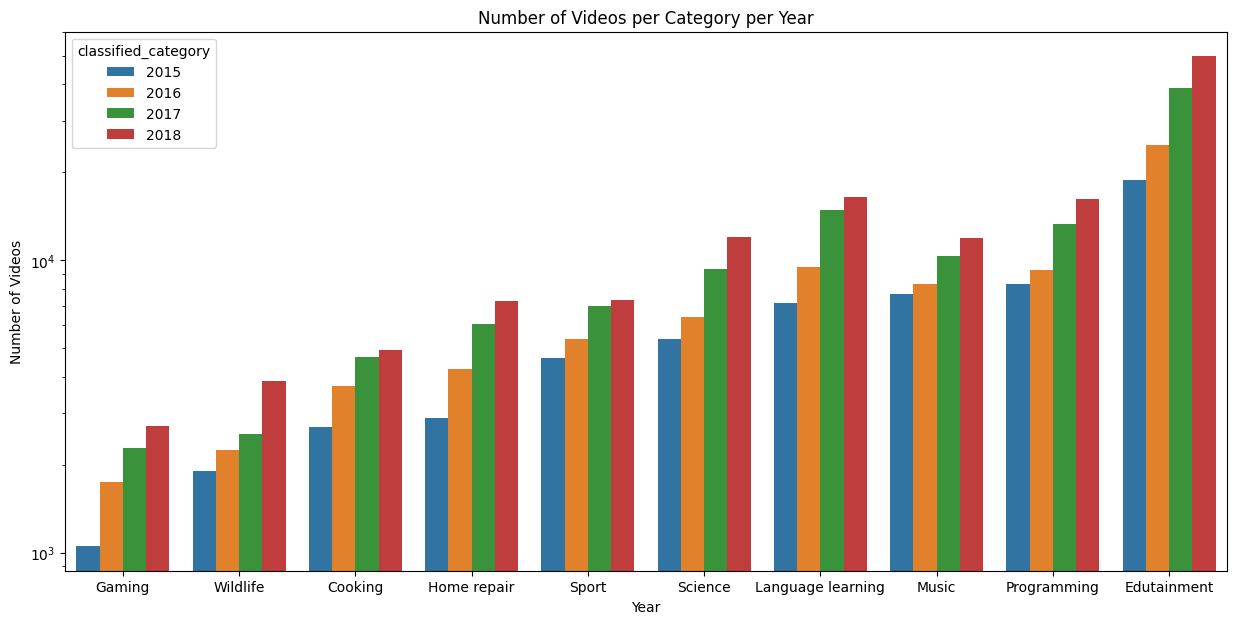

C:\Users\Flori\AppData\Local\Temp\ipykernel_49304\2697887849.py:37: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  pd.Grouper(key='upload_date', freq='M'), classification_type


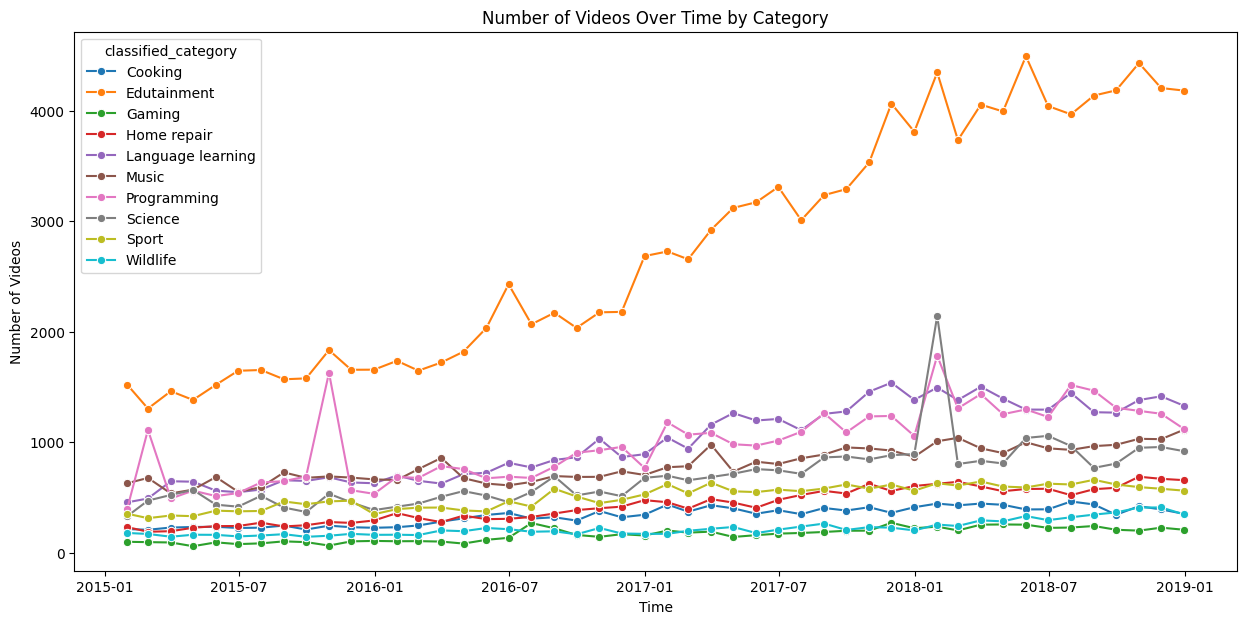

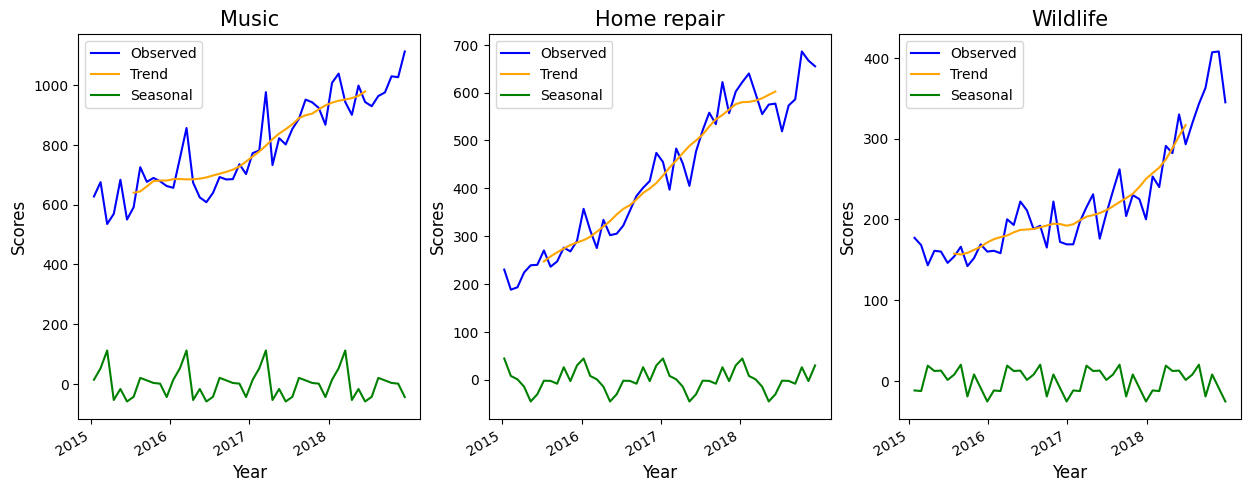

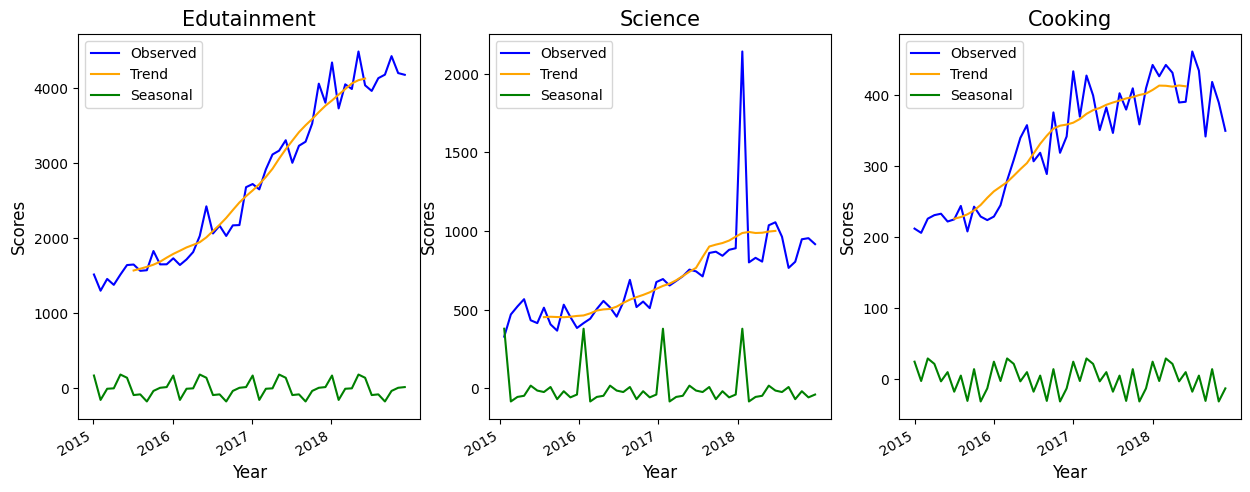

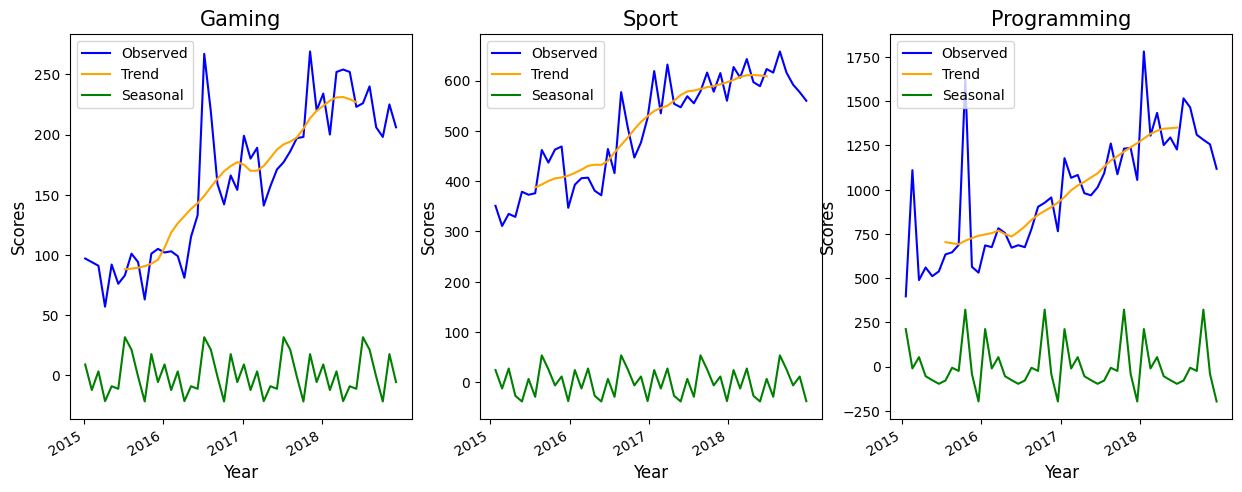

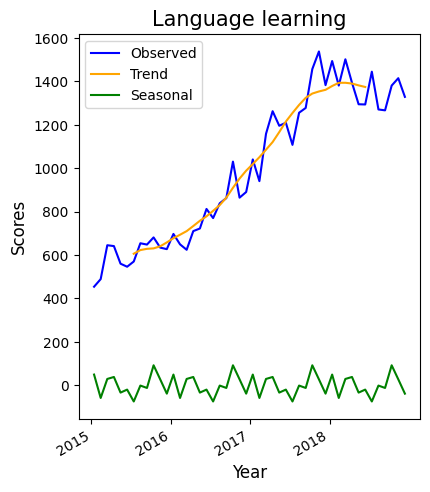

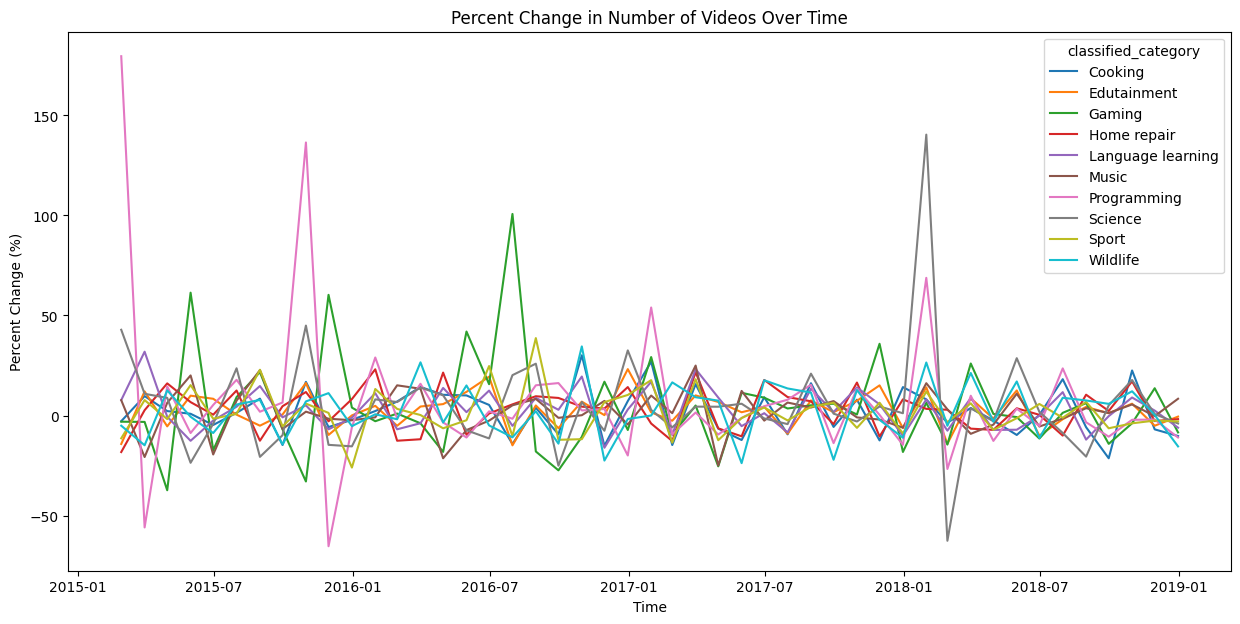

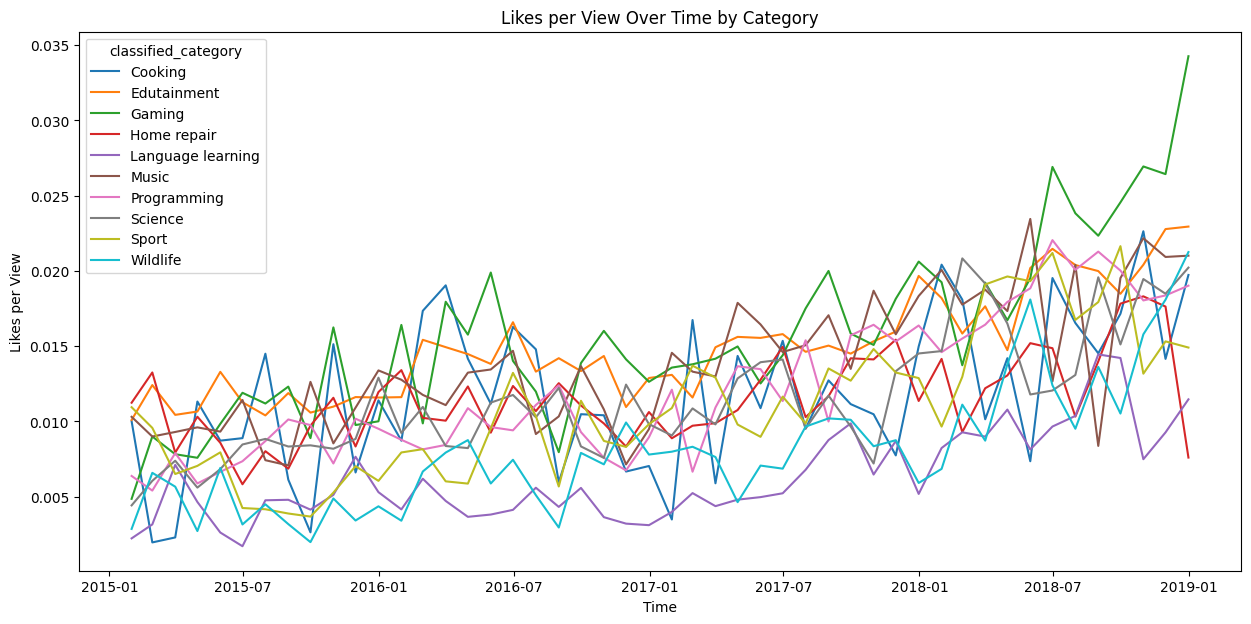

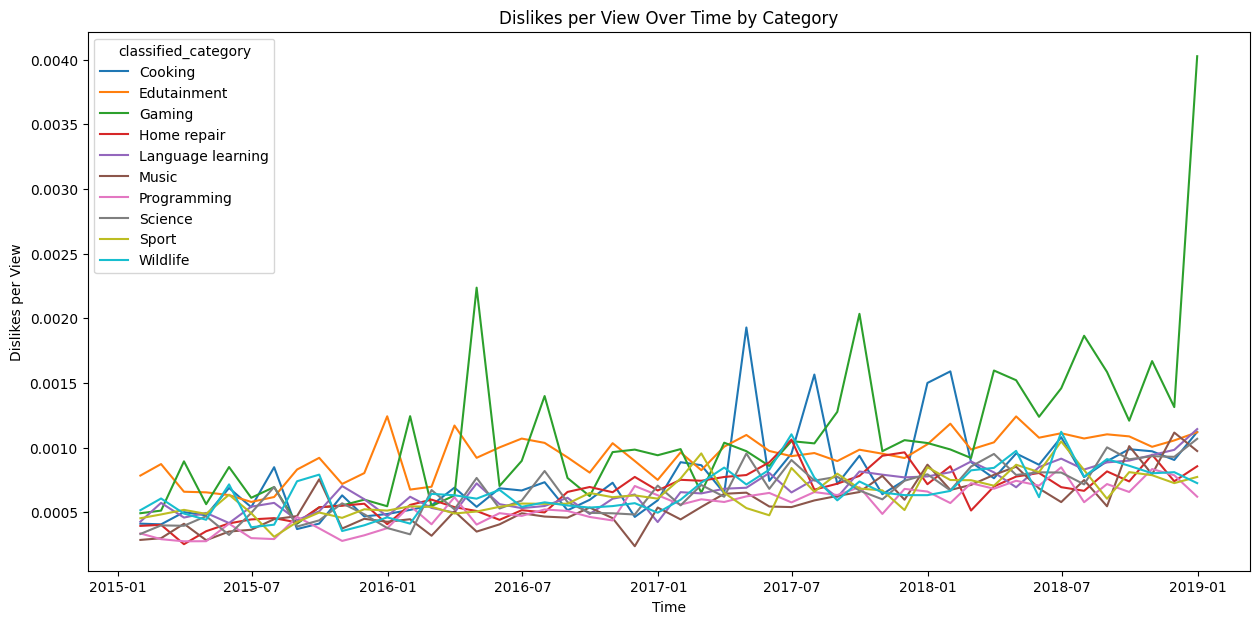

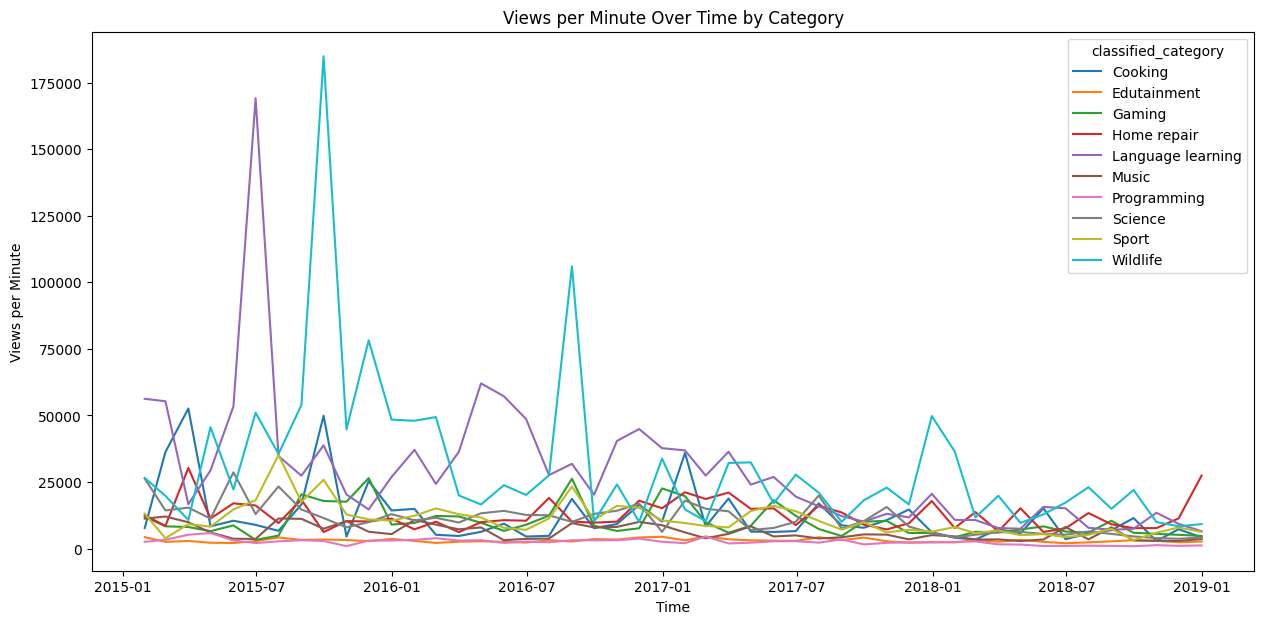

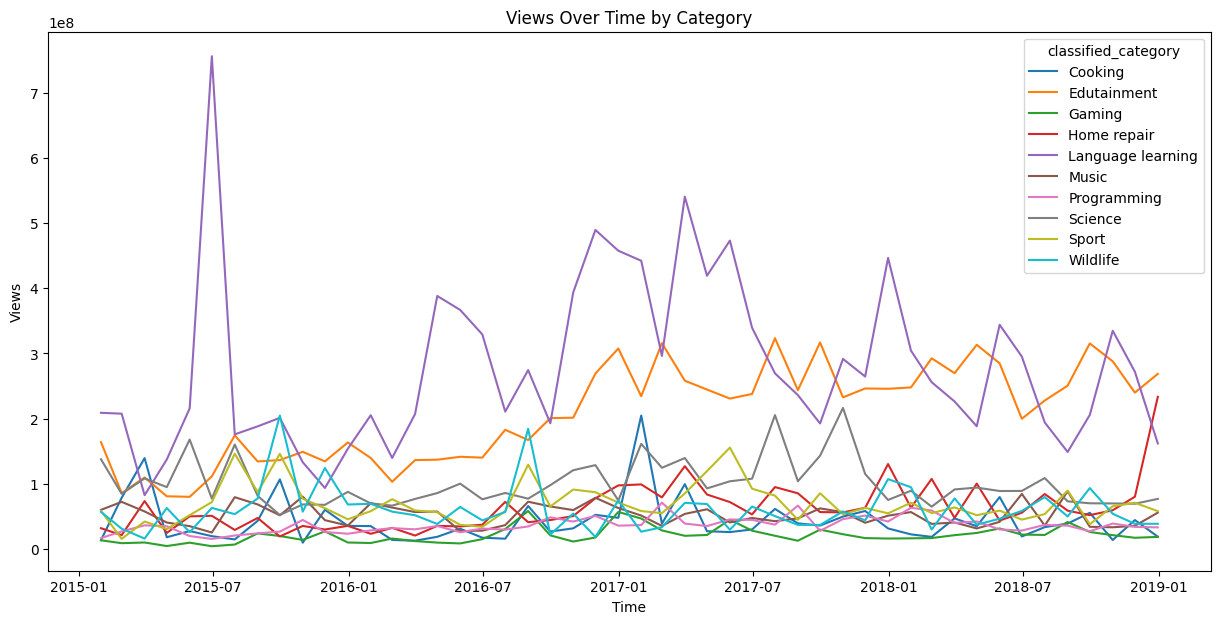

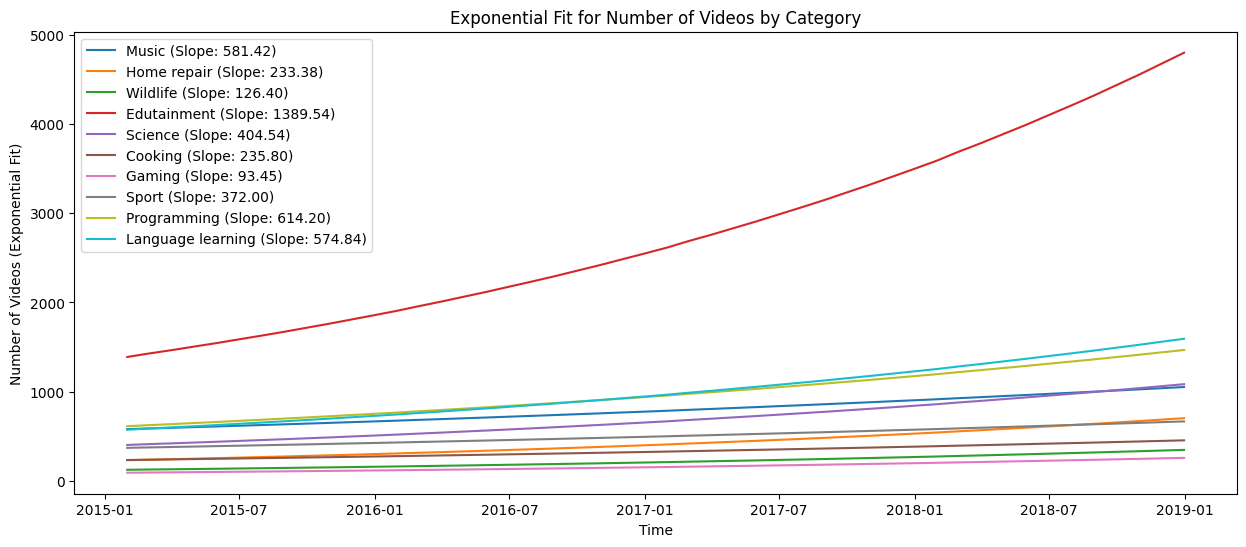

Exponential Growth Slopes:
Music: 581.42116
Home repair: 233.38294
Wildlife: 126.39551
Edutainment: 1389.54077
Science: 404.53551
Cooking: 235.80030
Gaming: 93.45283
Sport: 371.99962
Programming: 614.20087
Language learning: 574.84201


In [96]:
analyze_trends(df_education_viva, classification_type='classified_category')